In [1]:
from phi.flow import *
import numpy as np
import matplotlib.pyplot as plt

# Supervised Network Training

Initial state $(t=0)$
<br> $p_{0} = (x_{0}, y_{0})$
<br> $v_{0} = (v_{x}, v_{y})$

Gravity is the only force acting on the ball

In [2]:
# p = position(t)
# v = velocity(t)
gravity = -9.81
p_0 = (0, 3)
v_0 = (1, 2)
dt_vec = (0.001, 0.01, 0.1, 0.2, 0.5)
t_end = 1

## 1. Analytic Trajectories

In [3]:
#analytical solution
def compute_state(t, p_0, v_0):
    #compute position
    p_x = v_0[0]*t + p_0[0]
    p_y = 0.5 * gravity * t ** 2 + v_0[1]*t + p_0[1]
    p = (p_x, p_y)

    #compute velocity
    v_x = v_0[0]
    v_y = gravity*t + v_0[1]
    v = (v_x, v_y)
    
    return p, v

def compute_trajectory(p_0, v_0, t_end):
    timesteps = np.linspace(0, t_end,50 )
    analytical_positions = []

    for t in timesteps:
        p, _ = compute_state(t, p_0, v_0)
        analytical_positions.append(p)

    return np.array(analytical_positions)

## 2. Simulation

In [4]:
#Euler step
def simulate_step(p, v, dt):
    p_next = (p[0] + v[0]*dt, p[1] + v[1]*dt)
    v_next = (v[0], v[1] + gravity*dt)
    
    return p_next, v_next

def simulate_trajectory(p_0, v_0, dt, t_end):
    t = 0
    positions = []
    p, v = p_0, v_0
    
    while t <= t_end:
        positions.append(p)
        p, v = simulate_step(p, v, dt)
        t += dt
    
    return np.array(positions)

### Plot Trajectories

In [5]:
def plot_trajectories(p_0, v_0, t_end, dt_vec):
    
    analytical_positions = compute_trajectory(p_0, v_0, t_end)
    plt.plot(analytical_positions[:, 0], analytical_positions[:, 1], label=f'Analytical p0: {p_0}, v0: {v_0}')
    
    for dt in dt_vec:
        euler_positions = simulate_trajectory(p_0, v_0, dt, t_end)
        plt.plot(euler_positions[:, 0], euler_positions[:, 1], '--', label=f'Euler dt={dt}')
    
    plt.title('Trajectory of the ball')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.legend()
    plt.grid(True)
    plt.show()

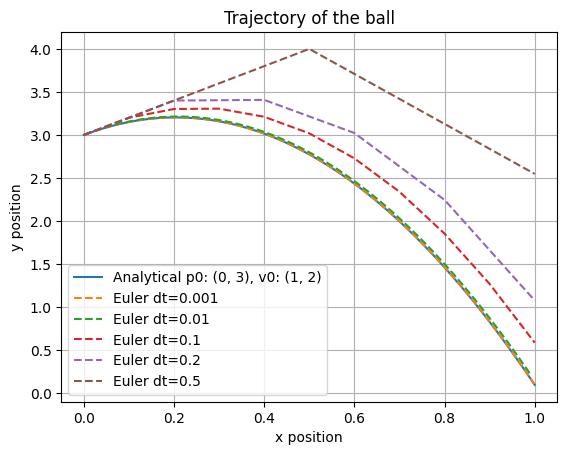

In [6]:
#plot analytical trajectory + euler trajectory for different timesteps
plot_trajectories(p_0, v_0, t_end, dt_vec)

From the plot can be seen how the error increases with increasing timesteps

## 3. Dataset

In [7]:
def generate_trajectories(num_trajectories, t_end, dt):
    math.seed(42)
    
    trajectories = []

    for _ in range(num_trajectories):
        p_0 = (math.random_uniform(0, 10), math.random_uniform(0, 10))
        v_0 = (math.random_uniform(0, 10), math.random_uniform(0, 10))
        
        analytical_positions = compute_trajectory(p_0, v_0, t_end)
        euler_positions = simulate_trajectory(p_0, v_0, dt, t_end)
        
        trajectories.append({
            'initial_conditions': {'p_0': p_0, 'v_0': v_0},
            'analytical': analytical_positions,
            'euler': euler_positions
        })
    
    return trajectories

In [8]:
def plot_generated_trajectories(trajectories):
    plt.figure(figsize=(12, 6))
    traj_index = 1
    for trajectory in trajectories:
        p_0 = trajectory['initial_conditions']['p_0']
        v_0 = trajectory['initial_conditions']['v_0']
        
        analytical_positions = trajectory['analytical']
        euler_positions = trajectory['euler']
        
        plt.plot(analytical_positions[:, 0], analytical_positions[:, 1], label=f' Trajectory {traj_index}')
        plt.plot(euler_positions[:, 0], euler_positions[:, 1], '--')

        traj_index += 1
    
    plt.title('Generated Trajectories')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.legend()
    plt.grid(True)
    plt.show()

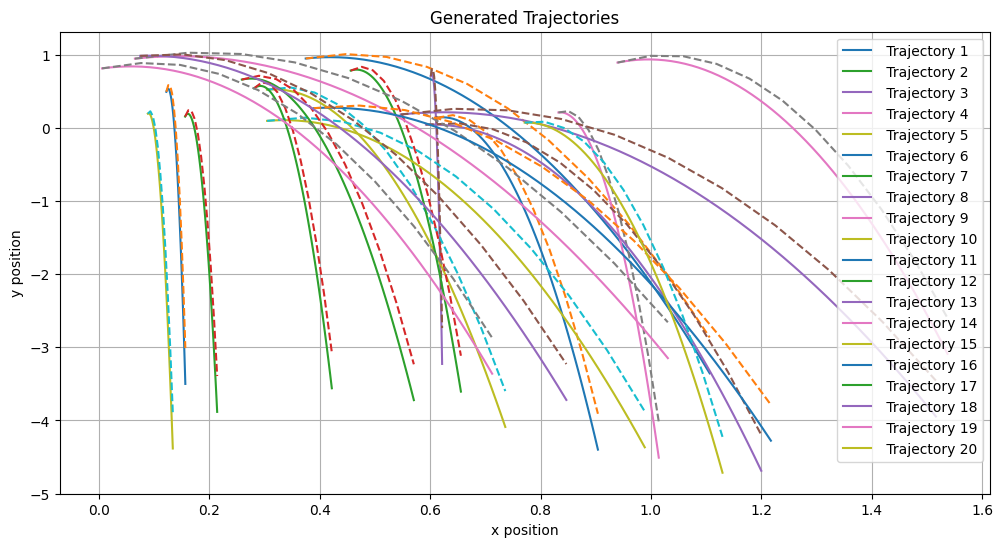

In [9]:
num_trajectories = 20
dt = 0.1
t_end = 1

trajectories = generate_trajectories(num_trajectories, t_end, dt)
plot_generated_trajectories(trajectories)

## 4. Neural Corrector

In [10]:
def prepare_data(trajectories):
    X = []
    y = []

    for trajectory in trajectories:
        for euler_p, analytical_p in zip(trajectory['euler'], trajectory['analytical']):
            X.append(euler_p)
            y.append(analytical_p)

    x = np.array(X)
    y = np.array(y)
    return x, y

In [11]:
# Generate training data and prepare if for network
num_trajectories = 100
t_end = 1
dt = 0.1

trajectories = generate_trajectories(num_trajectories, t_end, dt)
x, y = prepare_data(trajectories)

input_dim = x.shape[1]
output_dim = y.shape[1]

In [12]:
#create network
net = dense_net(input_dim, output_dim, [64, 64], activation='ReLU')
optimizer = adam(net, 1e-3)

NameError: name 'dense_net' is not defined

In [ ]:
def loss_function(x, y):
    prediction = math.native_call(net, data)
    label = x - y
    return math.l2_loss(prediction - label), x, label

for i in range(100):
    loss, _data, _label = update_weights(net, optimizer, loss_function, x, y)
print(f"Final loss: {loss}")